<a href="https://colab.research.google.com/github/gabi-bernardoni/Projeto-de-Mineracao-de-Textos/blob/main/BoW_%2B_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BoW + NaiveBayes
Bag of Words (BoW) é uma técnica de representação de texto que transforma documentos em vetores de características. No BoW, o texto é tratado como uma coleção de palavras. Cada documento é representado por um vetor que conta a frequência de cada palavra presente no documento.

Naive Bayes é um classificador probabilístico baseado no teorema de Bayes.


#Funcionamento do Modelo

Primeiro, pegamos os dados, contendo textos e suas respectivas classificações de sentimento. A primeira coisa que fazemos é separar os textos das classificações. Os textos são armazenados em uma variável, enquanto as classificações vão para outra.

Depois disso, dividimos esses dados em duas partes: uma parte para treinar o modelo e outra para testá-lo. Foi usado 80% dos dados para treino e 20% para teste.

Para que o modelo consiga entender os textos, tranformamos ele em números. Usamos (BoW), que cria um vetor para cada texto. Esse vetor mostra quantas vezes cada palavra do vocabulário aparece no texto.

Com os textos transformados em vetores, treinamos o modelo Naive Bayes. Este modelo é baseado em probabilidade e nos ajuda a prever a classificação de um texto novo baseado nas palavras que ele contém. Treinamos o modelo com os dados de treino para que ele aprenda as probabilidades das palavras em relação às classificações de sentimento.


### **Carregamento dos dados**

Primeiramento carregamos os dados  dos comentários

In [ ]:
import pandas as pd

dados_avaliacoes = pd.read_csv('avaliacoes.csv')
dados_avaliacoes.head(5)

reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...           negative   

  sentiment Unnamed: 5  
0   sadness        NaN  
1   sadness        NaN  
2   sadness        NaN  
3   sadness        NaN  
4   disgust        NaN

In [ ]:
dados_avaliacoes.describe()

reviewId app_name  \
count                                   3011     3011   
unique                                  3011       10   
top     01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
freq                                       1      303   

                                                  content sentiment_polarity  \
count                                                3011               3011   
unique                                               3011                  3   
top     O app da Shopee é razoável. Apesar de ser fáci...           negative   
freq                                                    1               1742   

       sentiment Unnamed: 5  
count       3011          1  
unique         7          1  
top      disgust          X  
freq         952          1

### **Pré Processamento**

Etapa em que limparemos os dados

In [ ]:
import regex # trabalhar com expressões regulares
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

In [ ]:
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(lambda x: str(x).lower()) ##Colocando todos os textos para minúsculo

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
                                                             ## remover stopwords no datafreme
def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(remove_stopwords) ##remover stopwords

In [ ]:
dados_avaliacoes.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

##Extração da features (representação de texto em formato vetorial)






In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
BoW_matriz = vectorizer.fit_transform(dados_avaliacoes['content'])

In [ ]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe

aap  aba  abaixa  abaixada  abaixado  abaixar  abaixaram  abaixe  \
0       0    0       0         0         0        0          0       0   
1       0    0       0         0         0        0          0       0   
2       0    0       0         0         0        0          0       0   
3       0    0       0         0         0        0          0       0   
4       0    0       0         0         0        0          0       0   
...   ...  ...     ...       ...       ...      ...        ...     ...   
3006    0    0       0         0         0        0          0       0   
3007    0    0       0         0         0        0          0       0   
3008    0    0       0         0         0        0          0       0   
3009    0    0       0         0         0        0          0       0   
3010    0    0       0         0         0        0          0       0   

      abaixei  abaixem  ...  últimamente  últimas  último  últimos  única  \
0           0        0  ...            0        0       0        0      0   
1           0        0  ...            0        0       0        0      0   
2           0        0  ...            0        0       0        0      0   
3           0        0  ...            0        0       0        0      0   
4           0        0  ...            0        0       0        0      0   
...       ...      ...  ...          ...      ...     ...      ...    ...   
3006        0        0  ...            0        0       0        0      0   
3007        0        0  ...            0        0       0        0      0   
3008        0        0  ...            0        0       0        0      0   
3009        0        0  ...            0        0       0        0      0   
3010        0        0  ...            0        0       0        0      0   

      únicas  único  únicos  úteis  útil  
0          0      0       0      0     0  
1          0      0       0      0     0  
2          0      0       0      0     0  
3          0      0       0      0     0  
4          0      0       0      0     0  
...      ...    ...     ...    ...   ...  
3006       0      0       0      0     0  
3007       0      0       0      0     0  
3008       0      0       0      0     0  
3009       0      0       0      0     0  
3010       0      0       0      0     0  

[3011 rows x 8845 columns]

# Treinamento e teste



In [ ]:
textos_bow = BOW_dataframe
sentimentos = dados_avaliacoes['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, sentimentos, test_size=0.2)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 20% dos dados de teste sem as categorias - "escondidas"

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.56      0.44      0.49       131
     disgust       0.56      0.69      0.62       190
        fear       0.00      0.00      0.00        11
   happiness       0.74      0.30      0.43        67
     neutral       0.00      0.00      0.00        13
     sadness       0.56      0.70      0.62       190
    surprise       0.00      0.00      0.00         1

    accuracy                           0.57       603
   macro avg       0.35      0.30      0.31       603
weighted avg       0.56      0.57      0.55       603



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Demonstrou desempenho alto, quando comparado com o TF-IDF, quando analisado com os modelos com KNN, se mostra superior. Isso pode se dar pelos dados e testes realizados com diferentes métricas.


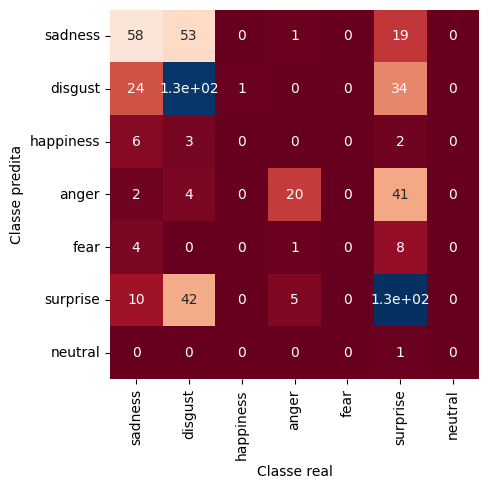

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=sentimentos.unique(),
            yticklabels=sentimentos.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

##Polaridade Sentimento



In [ ]:
textos_bow = BOW_dataframe
polaridade = dados_avaliacoes['sentiment_polarity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, polaridade, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

    negative       0.84      0.89      0.86       351
     neutral       1.00      0.05      0.10        20
    positive       0.80      0.79      0.79       232

    accuracy                           0.82       603
   macro avg       0.88      0.58      0.58       603
weighted avg       0.83      0.82      0.81       603



Seu desempenho quando comparado com TF-IDF foi praticamente igual, quando comparado com outros modelos mostra semelhança nos resultaods.

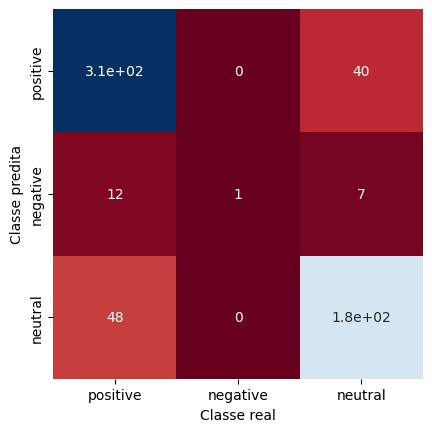

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=polaridade.unique(),
            yticklabels=polaridade.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

Vantagens:

Simplicidade: É fácil de entender e implementar;
Rapidez: Treina e faz previsões rapidamente;
Resistente a Dados Faltantes: Funciona bem mesmo se algumas palavras estiverem faltando.

Limitações:

Problemas com Palavras Raras: Palavras que aparecem raramente podem causar problemas;
Suposição de Independência: Assume que as palavras são independentes.
